In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
iomoves_df = pd.read_csv("Dataset Paper A 500 OI Moves 7 Apr 2020 A_v4.csv",encoding='latin1')

### The dataset imported in python

In [3]:
iomoves_df.head()

,Num of CS,Name of Company,Website,INPIRE Code,Country,Region,Sector,Manufacturing/Service,Size,Tech Intensity,...,Author,Interview date,Reviewer,OI Journey number,Relevant text in the case study,Innovating with,leading to,No in typology,Management score,Success score
0,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.2,In close cooperation with the University of Pa...,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful
1,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.3,under technology development contracts in coll...,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful
2,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.4,"Thus, Adamant established strategic collaborat...",Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful
3,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.5,"Thus, Adamant established strategic collaborat...",Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful
4,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.6,Adamants collaboration with Alchemy  a Greek...,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful


In [4]:
iomoves_df.columns

Index(['Num of CS', 'Name of Company', 'Website', 'INPIRE Code', 'Country',
       'Region', 'Sector', 'Manufacturing/Service', 'Size', 'Tech Intensity',
       'Life-cycle stage', 'Strong/Not strong case', 'Product Innovation',
       'Process Innovation', 'Service Innovation', 'Organizational Innovation',
       'Customer and MKG Innovation', 'Distribution Channels', 'Author',
       'Interview date', 'Reviewer', 'OI Journey number',
       'Relevant text in the case study', 'Innovating with', 'leading to',
       'No in typology', 'Management score', 'Success score'],
      dtype='object')

In [5]:
iomoves_df.loc[iomoves_df['Innovating with'] == 'Users (not paying the firm)','Innovating with'] = 'Users'

In [6]:
iomoves_thin_df = iomoves_df[['Num of CS','OI Journey number','Innovating with', 'leading to','No in typology','Management score',
       'Success score']].copy()

### We care for these columns now

In [7]:
iomoves_thin_df

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful
...,...,...,...,...,...,...,...
495,105,118.5,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful
496,105,118.6,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful
497,105,118.7,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful
498,105,118.8,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful


In [8]:
iomoves_thin_df[['Num of CS','OI Journey number']].dtypes

Num of CS              int64
OI Journey number    float64
dtype: object

In [9]:
iomoves_thin_df.loc[:,'oi_journey_number'] = iomoves_thin_df.loc[:,'OI Journey number'].apply(lambda x: str(x).split('.')[1])
iomoves_thin_df.loc[:,'oi_case_num'] = iomoves_thin_df.loc[:,'OI Journey number'].apply(lambda x: str(x).split('.')[0])

In [10]:
iomoves_thin_df[iomoves_thin_df['oi_case_num'] == '1']

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score,oi_journey_number,oi_case_num
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful,2,1
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful,3,1
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful,4,1
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful,5,1
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful,6,1
5,1,1.7,Complementary partners,Co-exploitation,5,7.Moderately well managed,7.Moderately successful,7,1


In [11]:
any(iomoves_thin_df.groupby('oi_case_num')['Num of CS'].nunique() != 1)

False

In [13]:
iomoves_thin_path_df = iomoves_thin_df[['Num of CS','oi_journey_number','Innovating with']]

In [14]:
iomoves_thin_path_df.loc[:,'oi_journey_number'] = iomoves_thin_path_df.loc[:,'oi_journey_number'].astype(int)

C:\Users\GrigoropoulosS\AppData\Local\Continuum\anaconda3\envs\oimoves\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
iomoves_thin_path_df.head()

,Num of CS,oi_journey_number,Innovating with
0,1,2,R&D service providers
1,1,3,Complementary partners
2,1,4,Customers
3,1,5,Customers
4,1,6,Complementary partners


In [40]:
iomoves_thin_path_df.groupby('Num of CS').count()[['oi_journey_number']].reset_index()

,Num of CS,oi_journey_number
0,1,6
1,2,5
2,3,3
3,4,4
4,5,5
...,...,...
101,102,6
102,103,5
103,104,3
104,105,7


In [16]:
iomoves_thin_path_df[iomoves_thin_path_df['Num of CS'] == 1].sort_values('oi_journey_number')['Innovating with']

0     R&D service providers
1    Complementary partners
2                 Customers
3                 Customers
4    Complementary partners
5    Complementary partners
Name: Innovating with, dtype: object

In [17]:
iomoves_thin_path_df['Num of CS'].nunique()

106

In [18]:
iomoves_thin_path_count_df = iomoves_thin_path_df.groupby('Num of CS').count().sort_values('oi_journey_number')
cs_cases = iomoves_thin_path_count_df[iomoves_thin_path_count_df['oi_journey_number'] > 2].\
reset_index()['Num of CS'].to_list()
#cs_cases

In [19]:
iomoves_thin_path2_df =iomoves_thin_path_df[iomoves_thin_path_df['Num of CS'].isin(cs_cases)]
iomoves_thin_path2_df[iomoves_thin_path2_df['oi_journey_number'] <=2]

,Num of CS,oi_journey_number,Innovating with
0,1,2,R&D service providers
6,2,1,R&D service providers
7,2,2,R&D service providers
11,3,1,R&D service providers
12,3,2,Complementary partners
...,...,...,...
485,103,2,Complementary partners
489,104,1,Suppliers
490,104,2,Complementary partners
492,105,1,R&D service providers


In [20]:
l = iomoves_thin_path_df[iomoves_thin_path_df['Num of CS'] == 1].\
sort_values('oi_journey_number')['Innovating with'].to_list()

In [21]:
def make_pairs(row):
    ret = []
    if row.shape[0] == 1:
        return ret
    else:
        l = row['Innovating with'].to_list()
        for i,v in enumerate(l[:-1]):
            t = (v,l[i+1])
            ret.append(t)
        return ret

In [22]:
oi_tuples = iomoves_thin_path_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(make_pairs)
oi_tuples

Num of CS
1      [(R&D service providers, Complementary partner...
2      [(R&D service providers, R&D service providers...
3      [(R&D service providers, Complementary partner...
4      [(R&D service providers, Customers), (Customer...
5      [(Customers, R&D service providers), (R&D serv...
                             ...                        
102    [(R&D service providers, Complementary partner...
103    [(Complementary partners, Complementary partne...
104    [(Suppliers, Complementary partners), (Complem...
105    [(R&D service providers, R&D service providers...
106                                                   []
Length: 106, dtype: object

In [23]:
oi_tuples_df = pd.DataFrame(oi_tuples).reset_index().rename({0:'oi_moves'},axis=1)
oi_tuples_df

,Num of CS,oi_moves
0,1,"[(R&D service providers, Complementary partner..."
1,2,"[(R&D service providers, R&D service providers..."
2,3,"[(R&D service providers, Complementary partner..."
3,4,"[(R&D service providers, Customers), (Customer..."
4,5,"[(Customers, R&D service providers), (R&D serv..."
...,...,...
101,102,"[(R&D service providers, Complementary partner..."
102,103,"[(Complementary partners, Complementary partne..."
103,104,"[(Suppliers, Complementary partners), (Complem..."
104,105,"[(R&D service providers, R&D service providers..."


In [24]:
flat_oi_moves_l = [item for sublist in oi_tuples_df['oi_moves'].values for item in sublist]
flat_oi_moves_l

[('R&D service providers', 'Complementary partners'),
 ('Complementary partners', 'Customers'),
 ('Customers', 'Customers'),
 ('Customers', 'Complementary partners'),
 ('Complementary partners', 'Complementary partners'),
 ('R&D service providers', 'R&D service providers'),
 ('R&D service providers', 'Competitors'),
 ('Competitors', 'Competitors'),
 ('Competitors', 'Complementary partners'),
 ('R&D service providers', 'Complementary partners'),
 ('Complementary partners', 'Complementary partners'),
 ('R&D service providers', 'Customers'),
 ('Customers', 'Suppliers'),
 ('Suppliers', 'Customers'),
 ('Customers', 'R&D service providers'),
 ('R&D service providers', 'Complementary partners'),
 ('Complementary partners', 'R&D service providers'),
 ('R&D service providers', 'Competitors'),
 ('R&D service providers', 'Complementary partners'),
 ('Complementary partners', 'R&D service providers'),
 ('R&D service providers', 'R&D service providers'),
 ('R&D service providers', 'Complementary pa

In [25]:
flat_oi_moves_df = pd.DataFrame(flat_oi_moves_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)
flat_oi_moves_df

,oi_moves_in,oi_moves_out
0,R&D service providers,Complementary partners
1,Complementary partners,Customers
2,Customers,Customers
3,Customers,Complementary partners
4,Complementary partners,Complementary partners
...,...,...
389,R&D service providers,Complementary partners
390,Complementary partners,R&D service providers
391,R&D service providers,R&D service providers
392,R&D service providers,Suppliers


In [26]:
from sklearn.metrics import confusion_matrix
labels = iomoves_thin_path_df['Innovating with'].unique()
conf_m = confusion_matrix(flat_oi_moves_df['oi_moves_in'], flat_oi_moves_df['oi_moves_out'],labels=labels)

In [27]:
conf_m_df = pd.DataFrame(conf_m, index=labels, columns=labels)

### Counts per move in the dataset

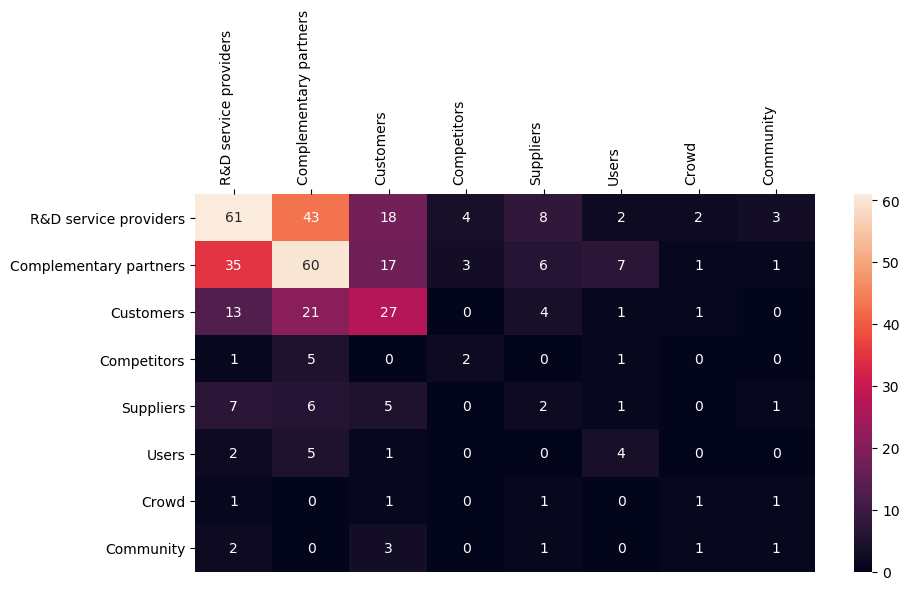

In [28]:
import seaborn as sns
plt.figure(figsize=(10,5))
chart = sns.heatmap(conf_m_df, annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

In [29]:
conf_mp_df = (conf_m_df.T /conf_m_df.T.sum()).T
conf_mp_df

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.432624,0.304965,0.127660,0.028369,0.056738,0.014184,0.014184,0.021277
Complementary partners,0.269231,0.461538,0.130769,0.023077,0.046154,0.053846,0.007692,0.007692
Customers,0.194030,0.313433,0.402985,0.000000,0.059701,0.014925,0.014925,0.000000
Competitors,0.111111,0.555556,0.000000,0.222222,0.000000,0.111111,0.000000,0.000000
Suppliers,0.318182,0.272727,0.227273,0.000000,0.090909,0.045455,0.000000,0.045455
Users,0.166667,0.416667,0.083333,0.000000,0.000000,0.333333,0.000000,0.000000
Crowd,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.200000
Community,0.250000,0.000000,0.375000,0.000000,0.125000,0.000000,0.125000,0.125000


### The Stochastic matrix
#### What are the probabilities of the next moves (for all cases :-))

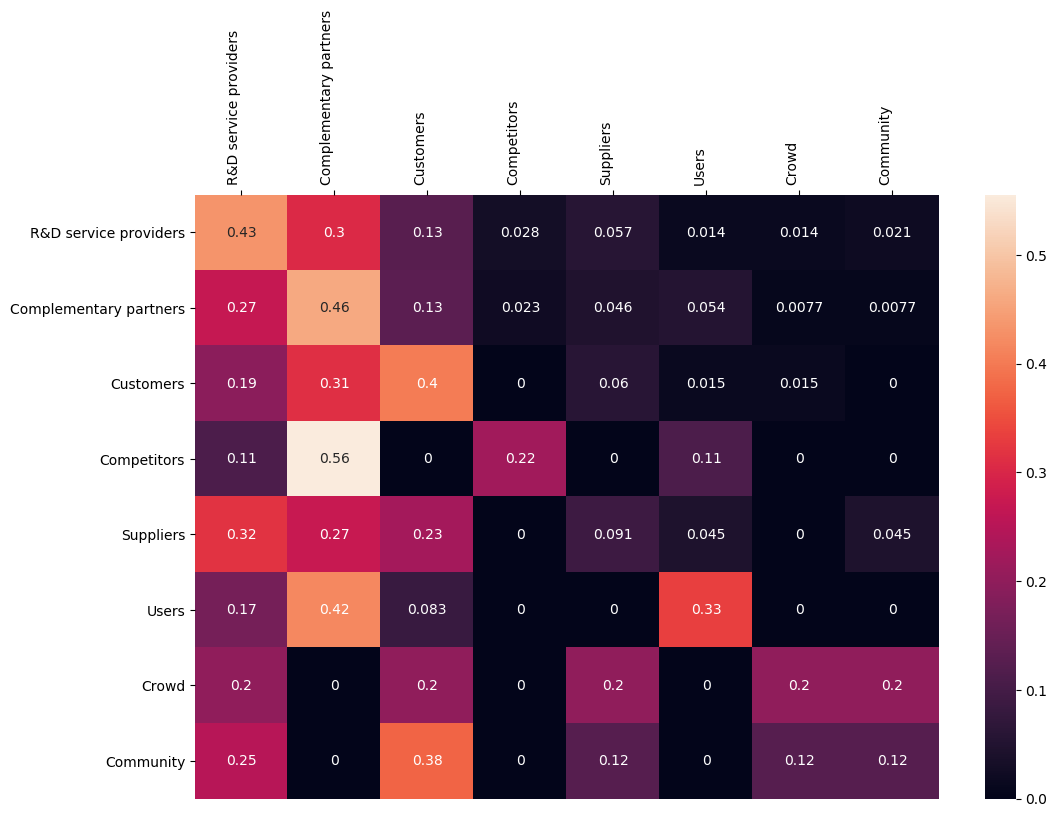

In [30]:
# plt.figure(figsize=(10,5))
chart =sns.heatmap(conf_mp_df, annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

In [31]:
np.dot(conf_mp_df.to_numpy(),conf_mp_df.to_numpy())

array([[0.32576428, 0.34984507, 0.17144603, 0.02561484, 0.05689722,
        0.03492225, 0.01588421, 0.01962608],
       [0.29579453, 0.38395478, 0.16682273, 0.02341685, 0.0510802 ,
        0.05323345, 0.01182095, 0.01387651],
       [0.27098746, 0.35264342, 0.24595149, 0.01273746, 0.05794621,
        0.03333288, 0.014163  , 0.0122381 ],
       [0.24085187, 0.46004829, 0.09609323, 0.06535532, 0.0319452 ,
        0.09321897, 0.00584955, 0.00663757],
       [0.30304241, 0.33787582, 0.2093653 , 0.01532014, 0.05815508,
        0.04187441, 0.01568507, 0.01868178],
       [0.25600822, 0.40814341, 0.13712364, 0.01434352, 0.03366216,
        0.13715486, 0.00681298, 0.00675123],
       [0.27896716, 0.17822493, 0.26658348, 0.00567376, 0.10646963,
        0.01491286, 0.07082195, 0.07834623],
       [0.27693995, 0.22786936, 0.28331839, 0.0070922 , 0.08856109,
        0.01482493, 0.04976811, 0.05162597]])

In [32]:
from numpy.linalg import matrix_power

In [33]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 2))

,0,1,2,3,4,5,6,7
0,0.325764,0.349845,0.171446,0.025615,0.056897,0.034922,0.015884,0.019626
1,0.295795,0.383955,0.166823,0.023417,0.051080,0.053233,0.011821,0.013877
2,0.270987,0.352643,0.245951,0.012737,0.057946,0.033333,0.014163,0.012238
3,0.240852,0.460048,0.096093,0.065355,0.031945,0.093219,0.005850,0.006638
4,0.303042,0.337876,0.209365,0.015320,0.058155,0.041874,0.015685,0.018682
5,0.256008,0.408143,0.137124,0.014344,0.033662,0.137155,0.006813,0.006751
6,0.278967,0.178225,0.266583,0.005674,0.106470,0.014913,0.070822,0.078346
7,0.276940,0.227869,0.283318,0.007092,0.088561,0.014825,0.049768,0.051626


### What are the probabilities of the second move (for all cases :-)).
#### Example : Given my stochastic matrix what is the probability a Customer to become a Competitor in TWO moves? 

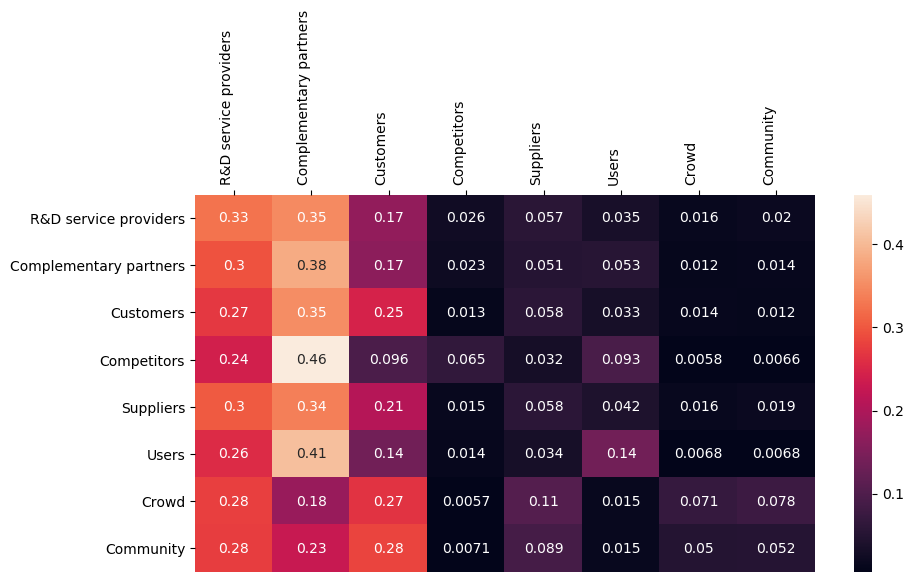

In [34]:
plt.figure(figsize=(10,5))
chart =sns.heatmap(pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 2), index=labels, columns=labels), annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

In [35]:
oi_tuples2 = iomoves_thin_path2_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(make_pairs)
oi_tuples2_df = pd.DataFrame(oi_tuples2).reset_index().rename({0:'oi_moves'},axis=1)
flat_oi_moves2_l = [item for sublist in oi_tuples2_df['oi_moves'].values for item in sublist]
flat_oi_moves2_df = pd.DataFrame(flat_oi_moves2_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)
conf_m2 = confusion_matrix(flat_oi_moves2_df['oi_moves_in'], flat_oi_moves2_df['oi_moves_out'],labels=labels)
conf_m2_df = pd.DataFrame(conf_m2, index=labels, columns=labels)
conf_mp2_df = (conf_m2_df.T /conf_m2_df.T.sum()).T
conf_mp2_df

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.440299,0.298507,0.126866,0.029851,0.052239,0.014925,0.014925,0.022388
Complementary partners,0.267717,0.464567,0.125984,0.023622,0.047244,0.055118,0.007874,0.007874
Customers,0.193548,0.290323,0.419355,0.000000,0.064516,0.016129,0.016129,0.000000
Competitors,0.111111,0.555556,0.000000,0.222222,0.000000,0.111111,0.000000,0.000000
Suppliers,0.285714,0.285714,0.238095,0.000000,0.095238,0.047619,0.000000,0.047619
Users,0.166667,0.416667,0.083333,0.000000,0.000000,0.333333,0.000000,0.000000
Crowd,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.200000
Community,0.250000,0.000000,0.375000,0.000000,0.125000,0.000000,0.125000,0.125000


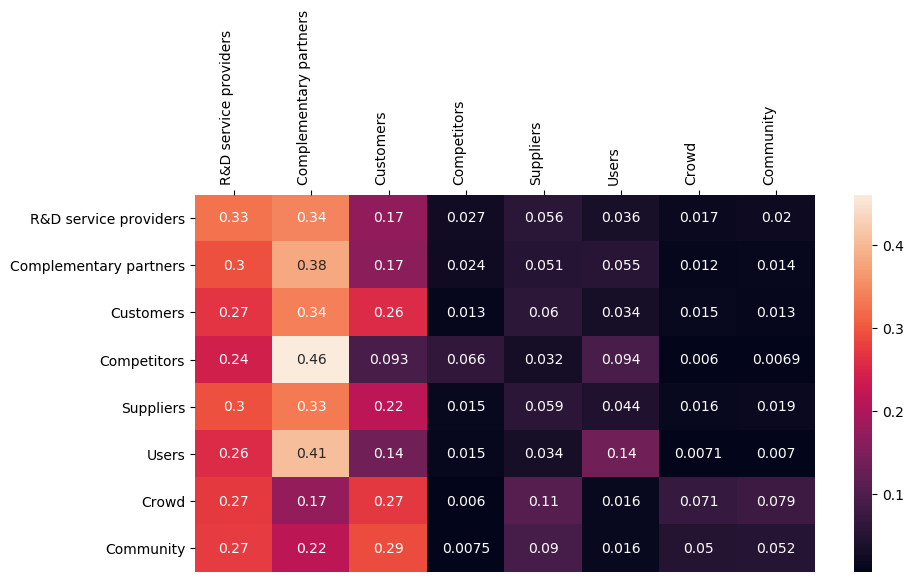

In [36]:
plt.figure(figsize=(10,5))
chart =sns.heatmap(pd.DataFrame(matrix_power(conf_mp2_df.to_numpy(), 2), index=labels, columns=labels), annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

### In  ~5 moves the probabilities already converge (remain the same after that...)

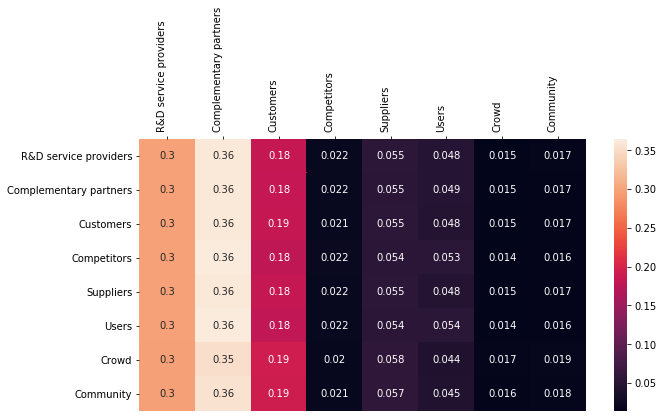

In [30]:
plt.figure(figsize=(10,5))
chart =sns.heatmap(pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 5), index=labels, columns=labels), annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

In [31]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 10))

,0,1,2,3,4,5,6,7
0,0.298246,0.360833,0.183756,0.021659,0.055251,0.048842,0.014784,0.016630
1,0.298246,0.360840,0.183746,0.021660,0.055248,0.048851,0.014782,0.016628
2,0.298246,0.360833,0.183758,0.021659,0.055251,0.048839,0.014784,0.016630
3,0.298245,0.360863,0.183710,0.021663,0.055238,0.048883,0.014777,0.016622
4,0.298246,0.360833,0.183757,0.021659,0.055251,0.048840,0.014784,0.016630
5,0.298244,0.360859,0.183717,0.021662,0.055240,0.048879,0.014777,0.016623
6,0.298243,0.360784,0.183831,0.021650,0.055270,0.048785,0.014796,0.016641
7,0.298245,0.360801,0.183807,0.021653,0.055264,0.048802,0.014792,0.016637


### Surprise : the probalities of convergence are the dataset's distribution of (innovating with) cases

In [32]:
iomoves_thin_path_df['Innovating with'].value_counts(normalize=True)

Complementary partners    0.340
R&D service providers     0.336
Customers                 0.178
Suppliers                 0.054
Users                     0.036
Competitors               0.024
Community                 0.018
Crowd                     0.014
Name: Innovating with, dtype: float64

C:\Users\GrigoropoulosS\AppData\Local\Continuum\anaconda3\envs\oimoves\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GrigoropoulosS\AppData\Local\Continuum\anaconda3\envs\oimoves\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


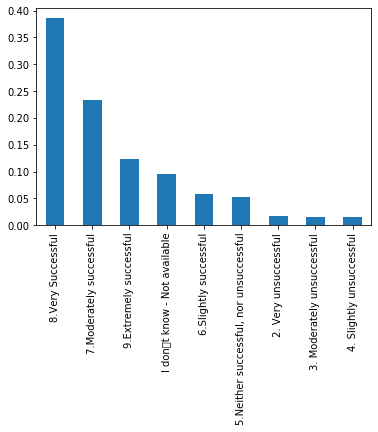

In [33]:
iomoves_df['Success score'].value_counts(normalize=True).plot.bar()

In [34]:
iomoves_df['Success score'].unique()

array(['8.Very Successful', '7.Moderately successful',
       '6.Slightly successful', 'I don\x92t know - Not available',
       '9.Extremely successful', '5.Neither successful, nor unsuccessful',
       '3. Moderately unsuccessful', '4. Slightly unsuccessful',
       '2. Very unsuccessful'], dtype=object)

In [35]:
iomoves_df.loc[iomoves_df['Success score'] == 'I don\x92t know - Not available','success_score'] = 0
iomoves_df.loc[iomoves_df['Management score'] == 'I don\x92t know - Not available','management_score'] = 0

In [36]:
iomoves_df.loc[iomoves_df['Success score'] != 'I don\x92t know - Not available','success_score'] = \
iomoves_df.loc[iomoves_df['Success score'] != \
               'I don\x92t know - Not available','Success score'].apply(lambda x :int(x.split('.')[0]))
iomoves_df.loc[iomoves_df['Management score'] != 'I don\x92t know - Not available','management_score'] = \
iomoves_df.loc[iomoves_df['Management score'] != \
               'I don\x92t know - Not available','Management score'].apply(lambda x :int(x.split('.')[0]))
iomoves_df[['management_score','success_score']] = iomoves_df[['management_score','success_score']].astype(int)

## Random stuff..

#### Success scores distribution (overly positive)

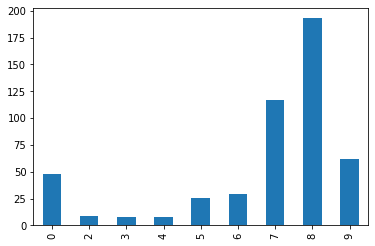

In [37]:
iomoves_df['success_score'].value_counts().sort_index().plot.bar()

#### Management scores distribution (overly positive)

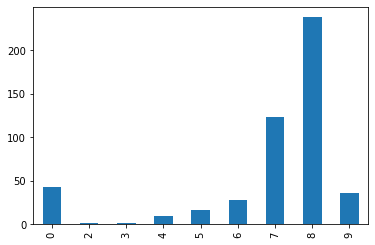

In [38]:
iomoves_df['management_score'].value_counts().sort_index().plot.bar()

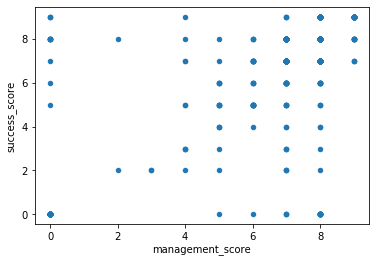

In [39]:
iomoves_df[['management_score','success_score']].plot.scatter(x='management_score',y='success_score')

### Maybe success and management score are correlated?

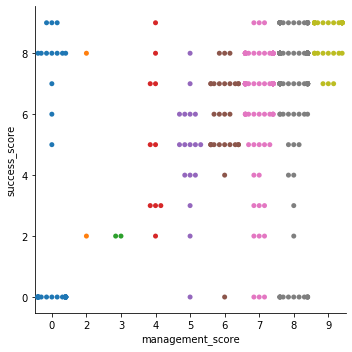

In [40]:
sns.catplot(x="management_score", y="success_score", kind='swarm', data=iomoves_df)

In [41]:
oitemp = \
iomoves_df[['Innovating with', 'management_score','success_score']].\
groupby(['success_score','management_score']).count().reset_index().rename(columns={'Innovating with':'cases_count'})

#### Yes they are lously correlated...

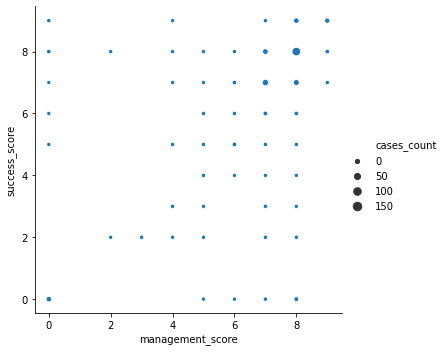

In [42]:
sns.relplot(x="management_score", y="success_score", size='cases_count', data=oitemp)

#### by...

In [43]:
print('%.2f'%(iomoves_df[['Innovating with', 'management_score','success_score']].corr().iloc[1,0]*100), '%')

59.28 %


In [44]:
iomoves_df['No in typology'].unique()

array([ 1,  4,  7,  5, 17,  2, 10, 16,  6,  8,  9, 13, 22, 19, 11, 23],
      dtype=int64)

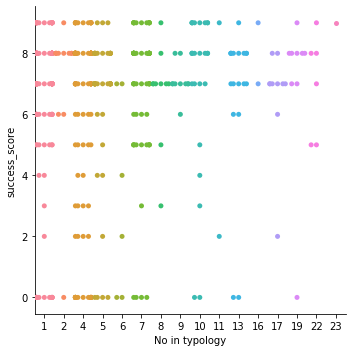

In [45]:
sns.catplot(x="No in typology", y="success_score", kind='swarm', data=iomoves_df)

### Is typology and success score correlated?

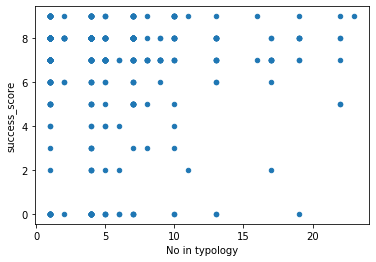

In [46]:
iomoves_df[['No in typology','success_score']].plot.scatter(x='No in typology',y='success_score')

### No, there are not...

In [47]:
print('%.2f'%(iomoves_df[['No in typology','success_score']].corr().iloc[1,0]*100), '% correlation')

3.55 % correlation


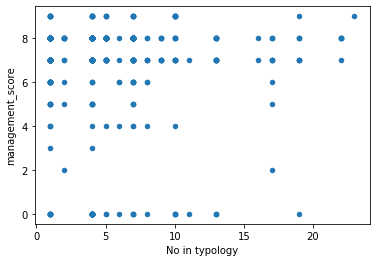

In [48]:
iomoves_df[['No in typology','management_score']].plot.scatter(x='No in typology',y='management_score')

### same for management score and typology...

In [49]:
print('%.2f'%(abs(iomoves_df[['No in typology','management_score']].corr().iloc[1,0]*100)), '% correlation')

2.27 % correlation


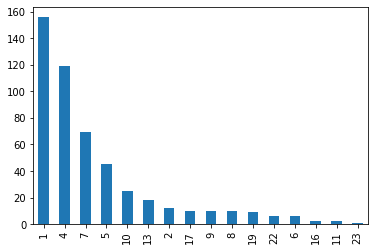

In [50]:
iomoves_df['No in typology'].value_counts().plot.bar()

In [51]:
import matplotlib.pyplot as plt
import networkx as nx

In [52]:
import pydtmc as dtmc

In [53]:
conf_mp_df.to_numpy()
mc = dtmc.MarkovChain(conf_mp_df.to_numpy(), labels)

In [54]:
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           8
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        NO
 REVERSIBLE:     NO
 SYMMETRIC:      NO



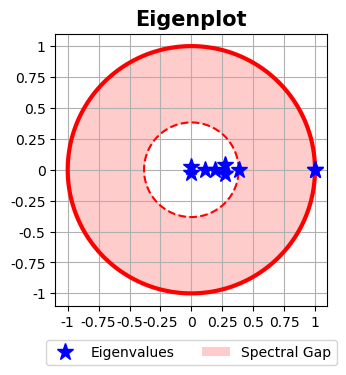

In [55]:
dtmc.plot_eigenvalues(mc)

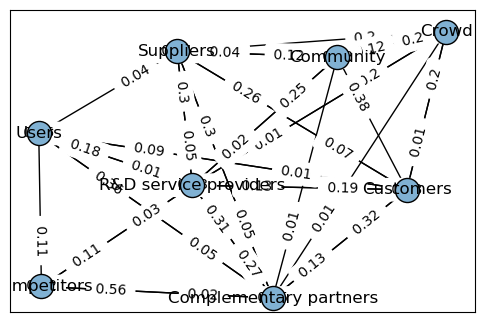

In [56]:
dtmc.plot_graph(mc)

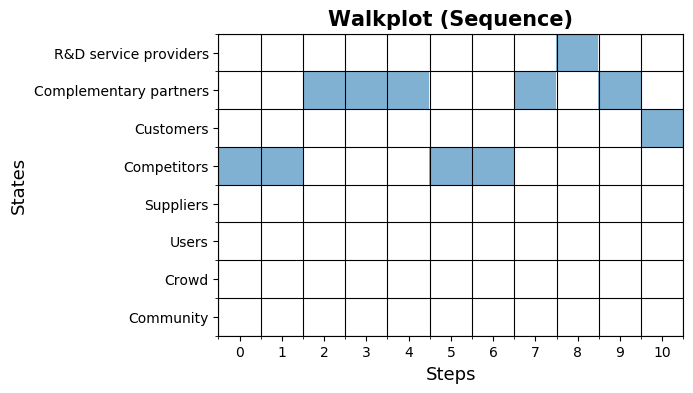

In [57]:
dtmc.plot_walk(mc, 10, 'Competitors','sequence')

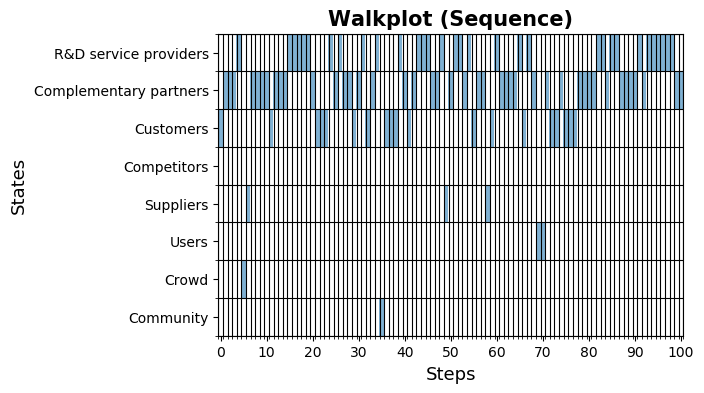

In [58]:
dtmc.plot_walk(mc, 100, 'Customers','sequence')

In [59]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')